**Solution (70%)**

Data Description

Data Exploration

Pipeline for your work  

Data Preparation (Missing values, outliers)

Data Transformation (normalization, onehotEncoding, log transformation etc)

Trying multiple models

Hyper parameter Tuning

**Results (20%)**

Interpreting Results

Your actual results and model performance

**Coding (5%)**

Inline comments

Code Readability

Variable naming consistency

Explaining what you are doing, why you are doing, and what happened after
applying the change you just did!

**Presentation (5%)**

Professional Slides with high quality images/charts without spelling errors

Suitable color/fonts/size considering video projector

Right volume of contents to ensure you can explain contents in the given time

Story telling

Ability to answer question

Manage time

**How to develop code for the project:**

Put your code into a Jupyter Notebook and keep the output of each cell as part of notebook.

You also need to prepare a power point presentation with below slides:

1-Introduction/Background (Optional)

2- Problem statement or project aim/objectives

2-Methodology

3- Results & Discussion

4- Challenges during execution

5- Lesson learnt


### Data description
Data Description:

Age (5-year gap)

Height (cm)

Weight (kg)

Waist circumference (cm)

Eyesight (left)

Eyesight (right)

Hearing (left)

Hearing (right)

Systolic blood pressure

Diastolic blood pressure (relaxation)

**Fasting blood sugar** (target variable divided into no risk (<100), prediabetics (100-125), diabetics categories(> 125))

Total Cholesterol

Triglyceride

HDL cholesterol

LDL cholesterol

Hemoglobin

Urine protein

Serum creatinine

AST (glutamic oxaloacetic transaminase)

ALT (glutamic oxaloacetic transaminase)

GTP (γ-GTP)

Dental caries

Smoking status

# LOAD DATASET

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/sinahem/Machine-Learning-Assignment/refs/heads/main/train.csv"
df = pd.read_csv(url)

In [ ]:
# # Step 1: Drop duplicates if any
# df.drop_duplicates(inplace=True)

# # Step 4: Handle outliers using Z-score
# numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# z_scores = np.abs(stats.zscore(df[numeric_cols]))
# df = df[(z_scores < 3).all(axis=1)]

In [ ]:
df.head() #what dataset looks like

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,40.0,155.0,70.0,83.3,0.9,0.5,1.0,1.0,118.0,...,78.0,106.0,13.1,1.0,0.7,13.0,8.0,25.0,0.0,0.0
1,1,40.0,175.0,80.0,86.5,1.0,1.0,1.0,1.0,130.0,...,51.0,96.0,16.9,1.0,1.0,29.0,32.0,67.0,0.0,1.0
2,2,50.0,150.0,75.0,90.0,0.7,0.9,1.0,1.0,130.0,...,55.0,150.0,14.7,1.0,0.9,30.0,23.0,35.0,0.0,0.0
3,3,35.0,170.0,65.0,80.0,1.5,1.5,1.0,1.0,118.0,...,57.0,117.0,14.5,1.0,0.9,27.0,26.0,20.0,1.0,1.0
4,4,40.0,160.0,70.0,85.0,1.0,1.0,1.0,1.0,130.0,...,55.0,126.0,14.3,1.0,0.9,20.0,13.0,17.0,0.0,0.0


In [ ]:
def label_diabetes(fbs):
    if fbs < 100:
        return 'no_risk'
    elif 100 <= fbs <= 125:
        return 'prediabetes'
    else:
        return 'diabetes'

In [ ]:
#df["diabetes_multiclass"] creates a new column in the dataset called diabetes_multiclass. This column will store the diabetes risk classification for each patient.
df["diabetes_multiclass"] = df["fasting blood sugar"].apply(label_diabetes)

In [ ]:
#preporocess , remove unneeded columns
columns_to_drop = ['id', 'fasting blood sugar']
df = df.drop(columns=columns_to_drop)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#encode so its numbers -> 0,1,2
le = LabelEncoder()
df['label'] = le.fit_transform(df['diabetes_multiclass'])

In [ ]:
df.info() #looks like no missing values?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   height(cm)           15000 non-null  float64
 2   weight(kg)           15000 non-null  float64
 3   waist(cm)            15000 non-null  float64
 4   eyesight(left)       15000 non-null  float64
 5   eyesight(right)      15000 non-null  float64
 6   hearing(left)        15000 non-null  float64
 7   hearing(right)       15000 non-null  float64
 8   systolic             15000 non-null  float64
 9   relaxation           15000 non-null  float64
 10  Cholesterol          15000 non-null  float64
 11  triglyceride         15000 non-null  float64
 12  HDL                  15000 non-null  float64
 13  LDL                  15000 non-null  float64
 14  hemoglobin           15000 non-null  float64
 15  Urine protein        15000 non-null 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   height(cm)           15000 non-null  float64
 2   weight(kg)           15000 non-null  float64
 3   waist(cm)            15000 non-null  float64
 4   eyesight(left)       15000 non-null  float64
 5   eyesight(right)      15000 non-null  float64
 6   hearing(left)        15000 non-null  float64
 7   hearing(right)       15000 non-null  float64
 8   systolic             15000 non-null  float64
 9   relaxation           15000 non-null  float64
 10  Cholesterol          15000 non-null  float64
 11  triglyceride         15000 non-null  float64
 12  HDL                  15000 non-null  float64
 13  LDL                  15000 non-null  float64
 14  hemoglobin           15000 non-null  float64
 15  Urine protein        1

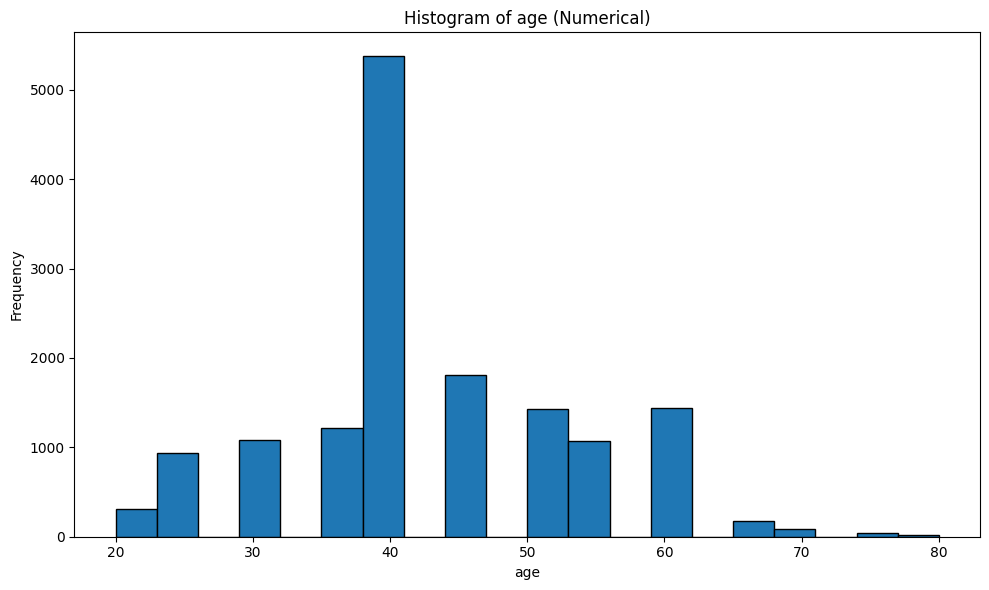


Summary for age:
count    15000.000000
mean        42.712000
std         10.475004
min         20.000000
25%         40.000000
50%         40.000000
75%         50.000000
max         80.000000
Name: age, dtype: float64
Missing values: 0


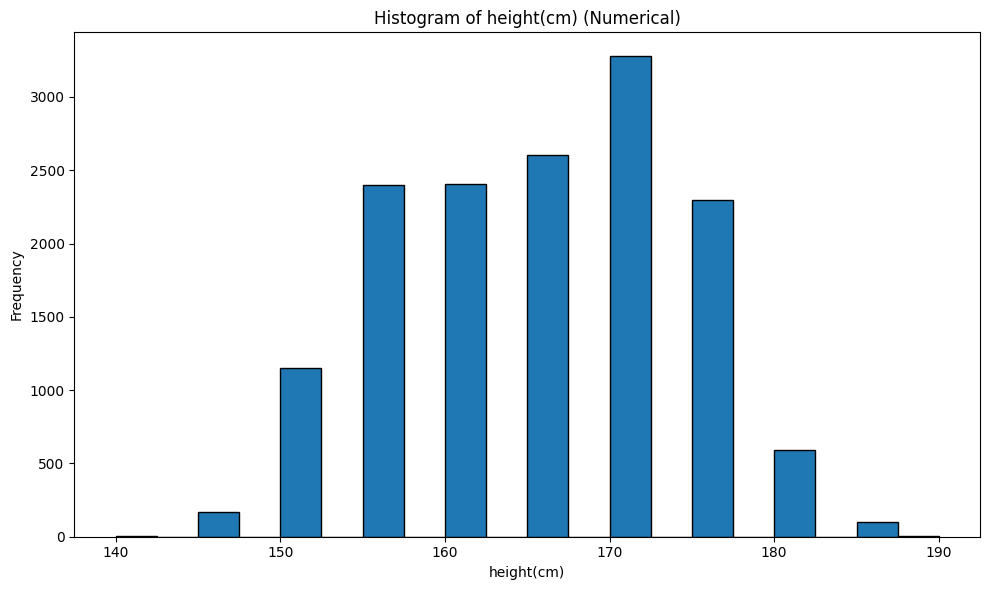


Summary for height(cm):
count    15000.000000
mean       164.565200
std          8.610042
min        140.000000
25%        160.000000
50%        165.000000
75%        170.000000
max        190.000000
Name: height(cm), dtype: float64
Missing values: 0


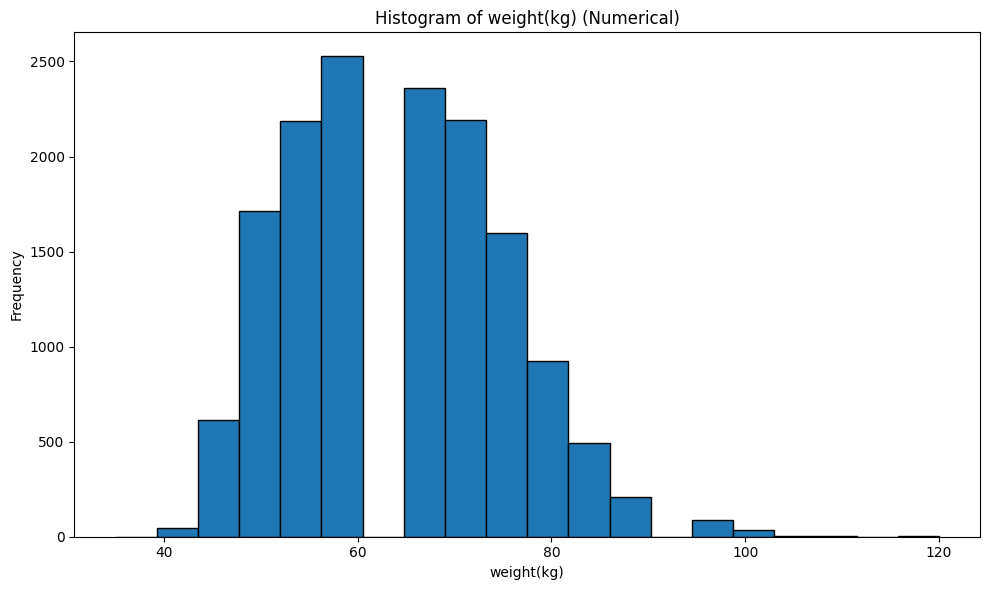


Summary for weight(kg):
count    15000.000000
mean        64.093667
std         11.023082
min         35.000000
25%         55.000000
50%         65.000000
75%         70.000000
max        120.000000
Name: weight(kg), dtype: float64
Missing values: 0


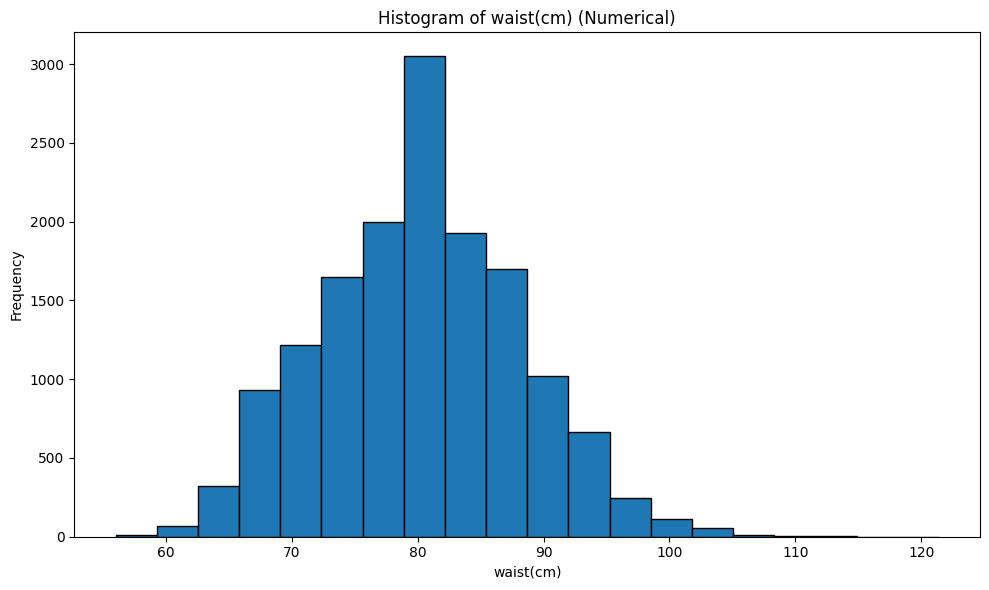


Summary for waist(cm):
count    15000.000000
mean        80.234020
std          7.890729
min         56.000000
25%         75.000000
50%         80.000000
75%         86.000000
max        121.400000
Name: waist(cm), dtype: float64
Missing values: 0


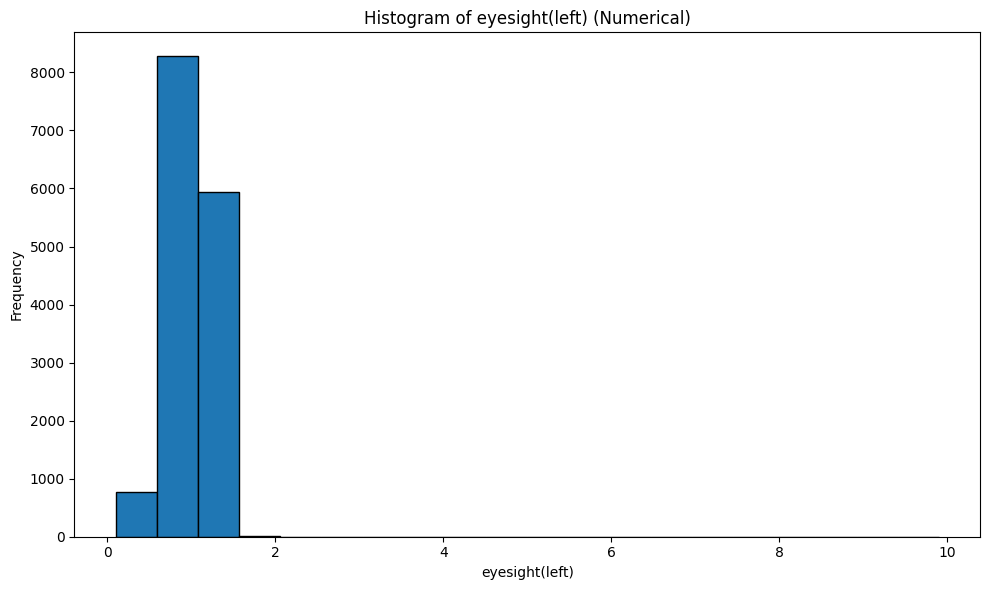


Summary for eyesight(left):
count    15000.000000
mean         1.029593
std          0.295928
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight(left), dtype: float64
Missing values: 0


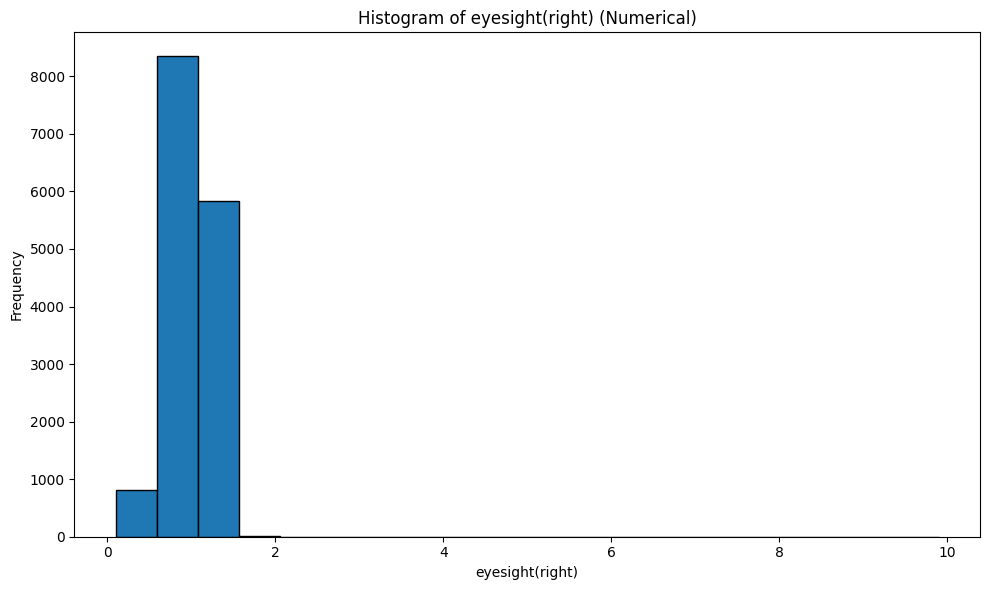


Summary for eyesight(right):
count    15000.000000
mean         1.024587
std          0.302981
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight(right), dtype: float64
Missing values: 0


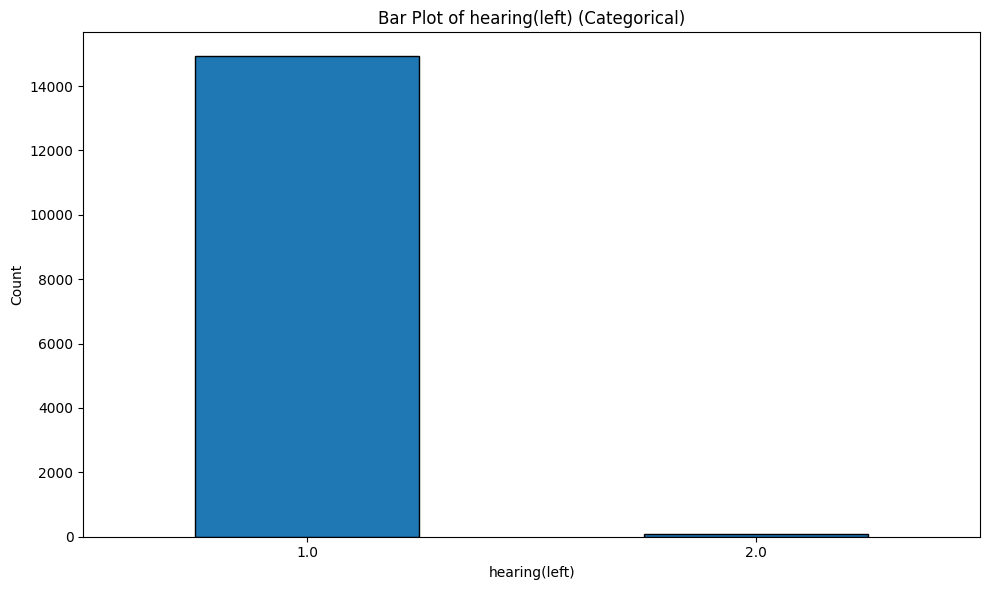


Summary for hearing(left):
hearing(left)
1.0    14925
2.0       75
Name: count, dtype: int64
Missing values: 0


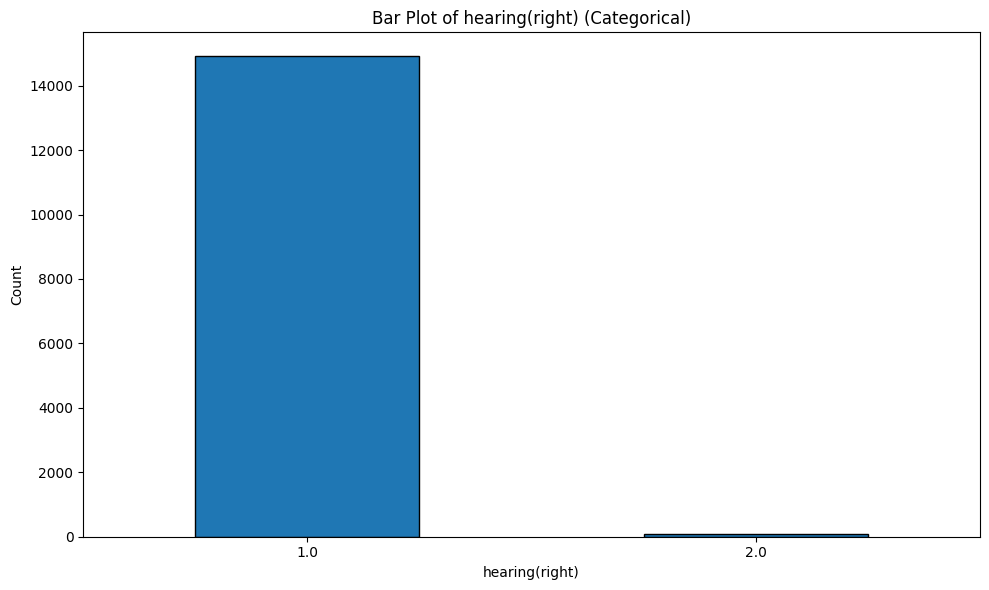


Summary for hearing(right):
hearing(right)
1.0    14910
2.0       90
Name: count, dtype: int64
Missing values: 0


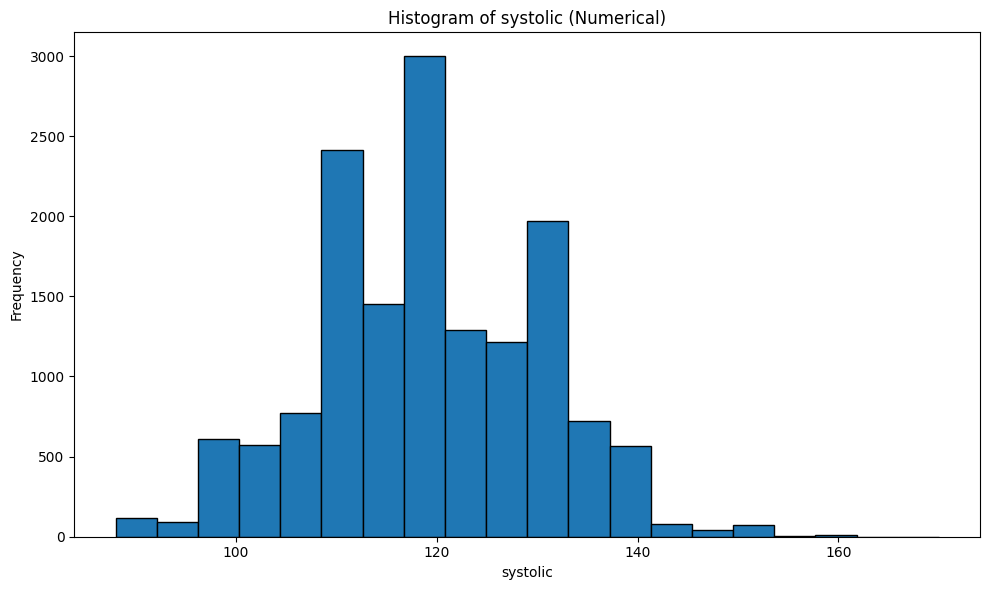


Summary for systolic:
count    15000.000000
mean       119.131133
std         10.961001
min         88.000000
25%        110.000000
50%        119.000000
75%        128.000000
max        170.000000
Name: systolic, dtype: float64
Missing values: 0


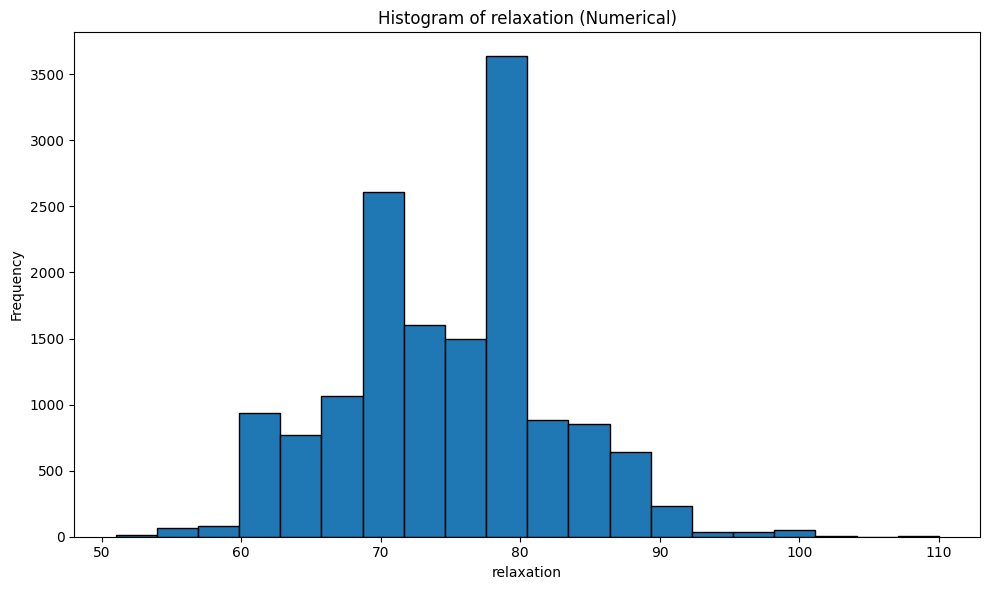


Summary for relaxation:
count    15000.000000
mean        74.813467
std          7.810041
min         51.000000
25%         70.000000
50%         75.000000
75%         80.000000
max        110.000000
Name: relaxation, dtype: float64
Missing values: 0


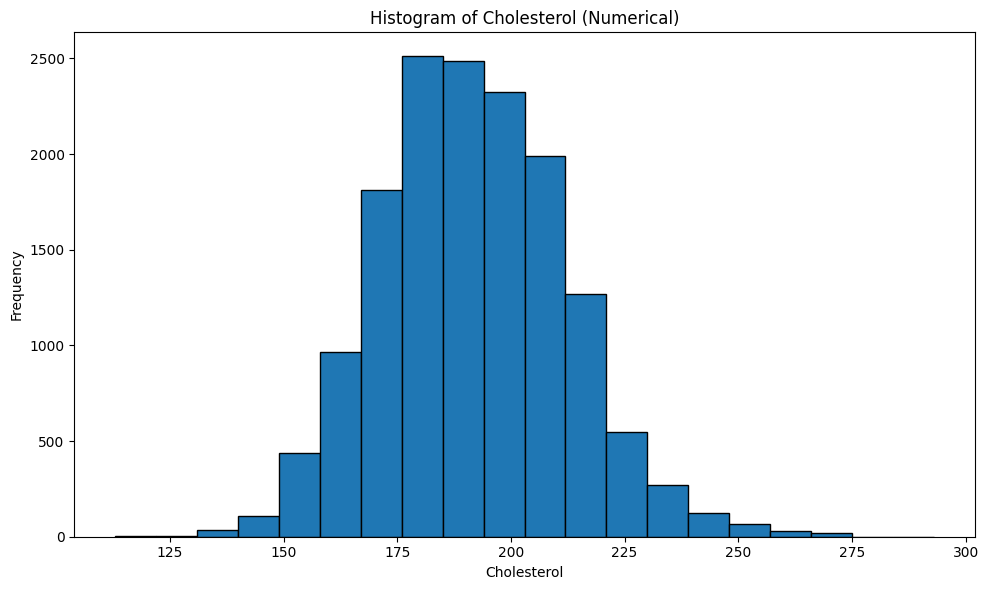


Summary for Cholesterol:
count    15000.00000
mean       191.18440
std         20.23907
min        113.00000
25%        177.00000
50%        191.00000
75%        205.00000
max        293.00000
Name: Cholesterol, dtype: float64
Missing values: 0


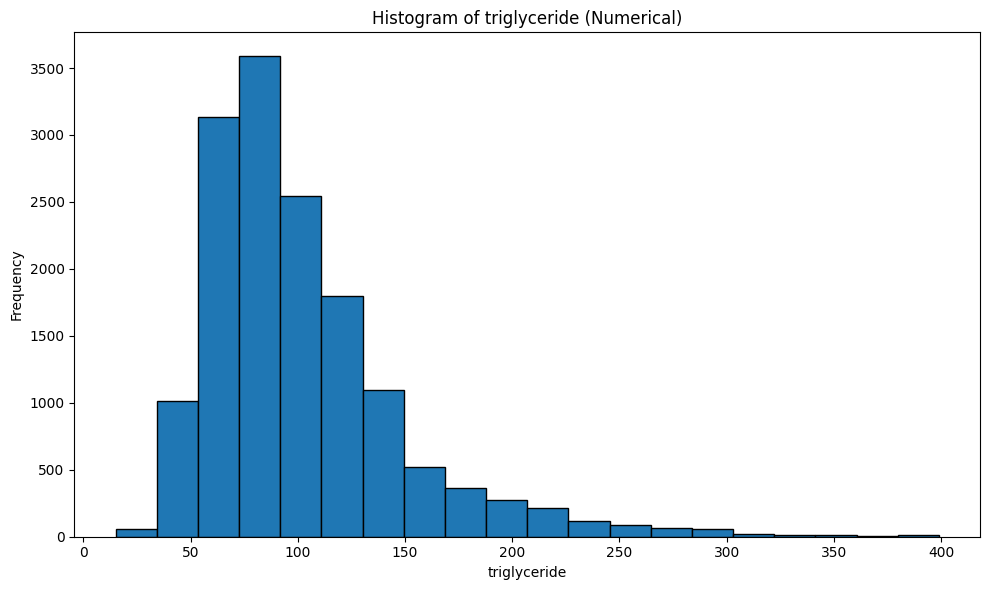


Summary for triglyceride:
count    15000.000000
mean       101.473867
std         46.791252
min         15.000000
25%         70.000000
50%         90.000000
75%        119.000000
max        399.000000
Name: triglyceride, dtype: float64
Missing values: 0


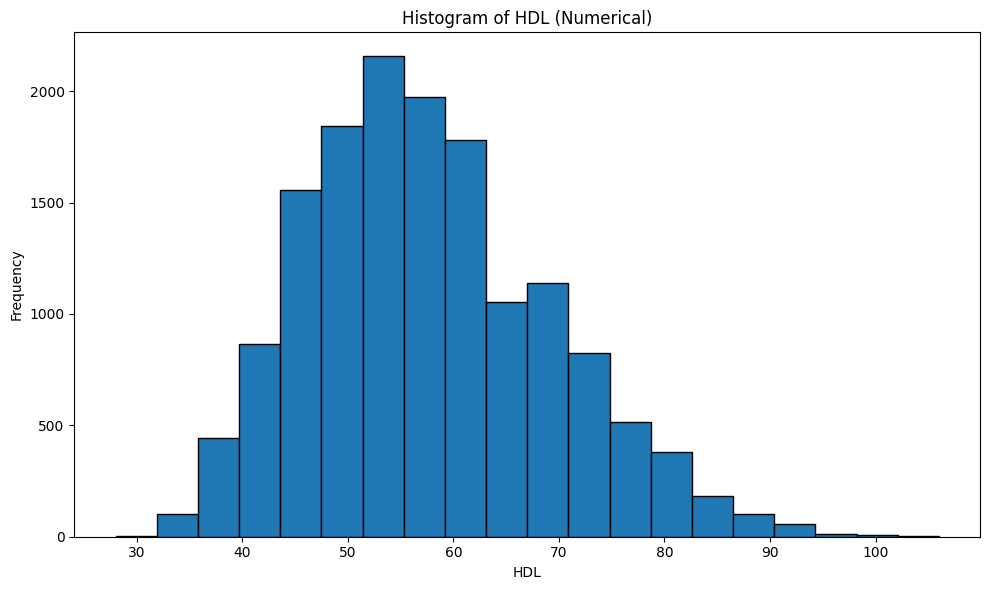


Summary for HDL:
count    15000.000000
mean        57.630733
std         11.449712
min         28.000000
25%         49.000000
50%         57.000000
75%         65.000000
max        106.000000
Name: HDL, dtype: float64
Missing values: 0


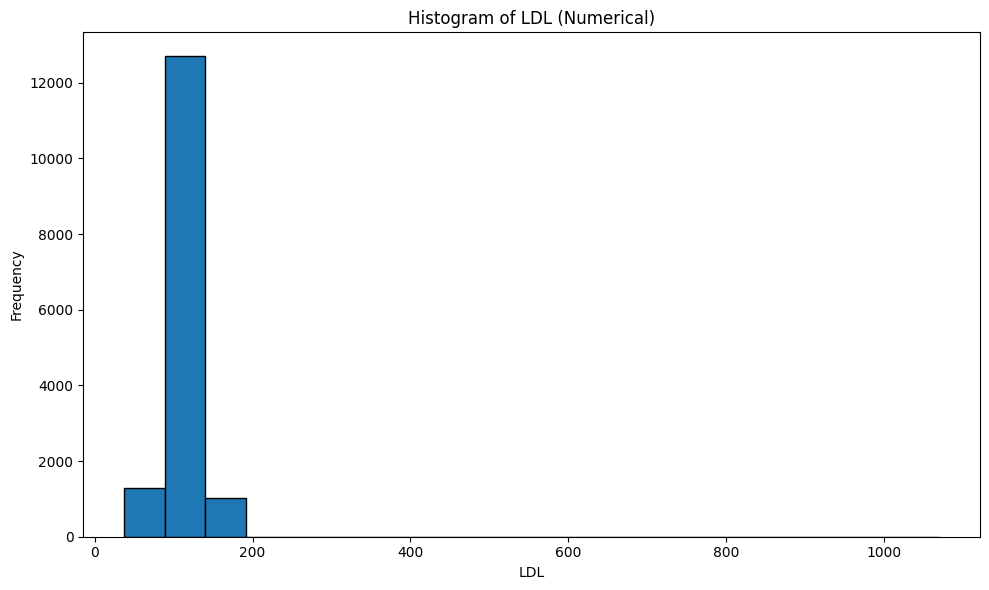


Summary for LDL:
count    15000.000000
mean       113.262667
std         19.954043
min         37.000000
25%        100.000000
50%        113.000000
75%        126.000000
max       1070.000000
Name: LDL, dtype: float64
Missing values: 0


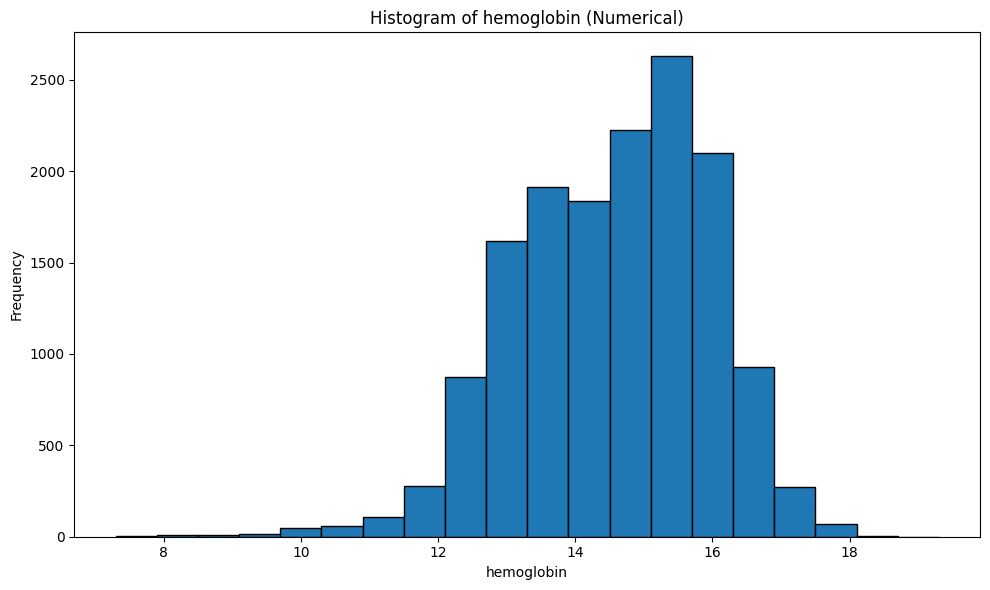


Summary for hemoglobin:
count    15000.000000
mean        14.501800
std          1.390368
min          7.300000
25%         13.500000
50%         14.700000
75%         15.600000
max         19.300000
Name: hemoglobin, dtype: float64
Missing values: 0


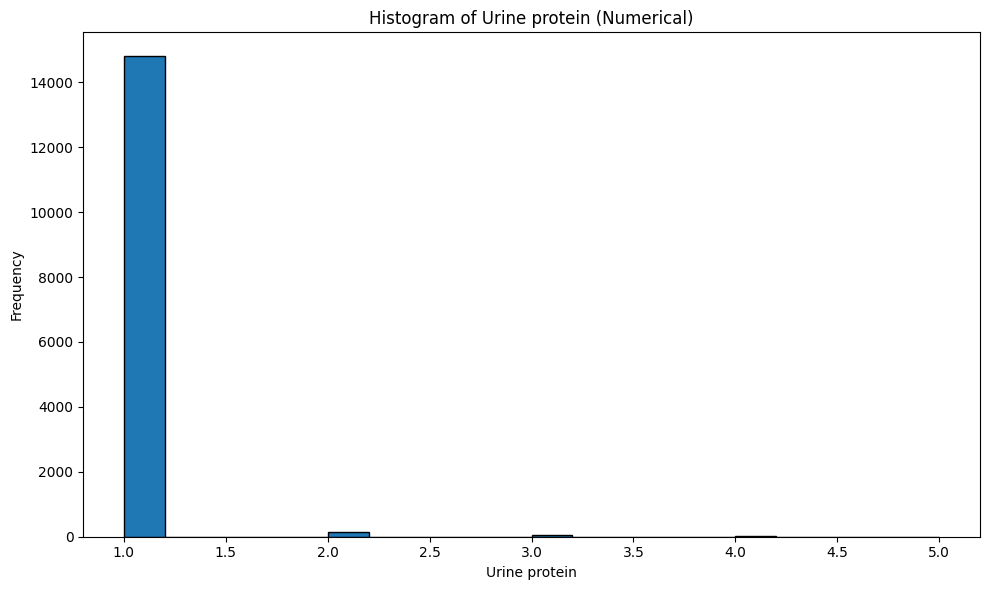


Summary for Urine protein:
count    15000.000000
mean         1.017867
std          0.169556
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Urine protein, dtype: float64
Missing values: 0


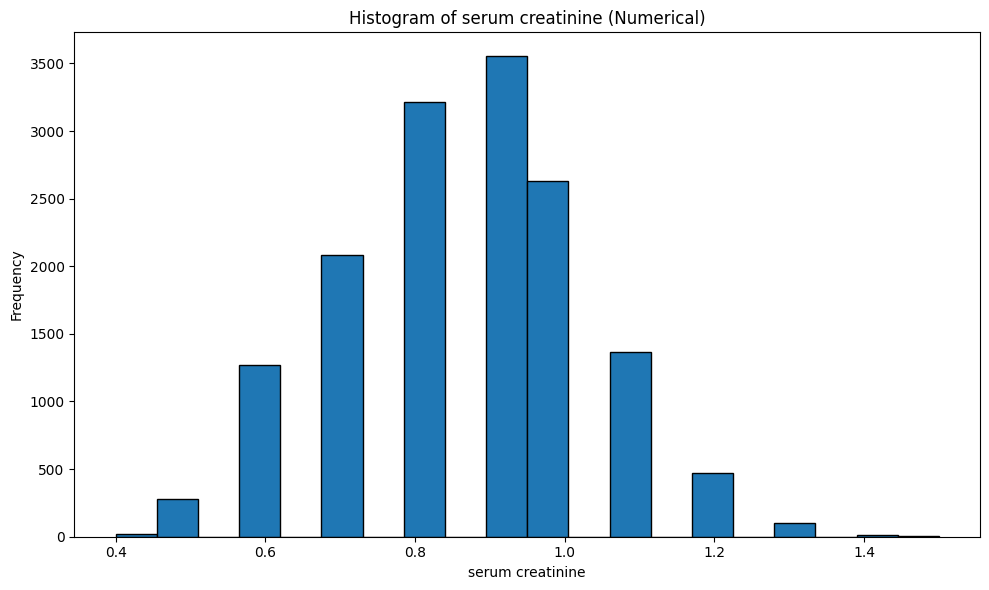


Summary for serum creatinine:
count    15000.000000
mean         0.866000
std          0.164517
min          0.400000
25%          0.800000
50%          0.900000
75%          1.000000
max          1.500000
Name: serum creatinine, dtype: float64
Missing values: 0


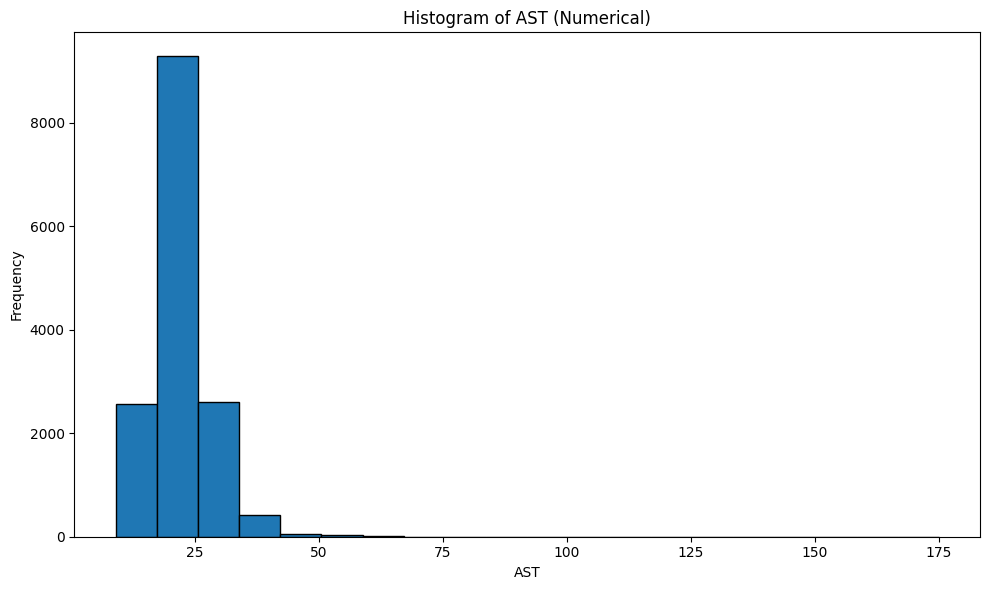


Summary for AST:
count    15000.000000
mean        22.231667
std          5.853547
min          9.000000
25%         19.000000
50%         21.000000
75%         25.000000
max        175.000000
Name: AST, dtype: float64
Missing values: 0


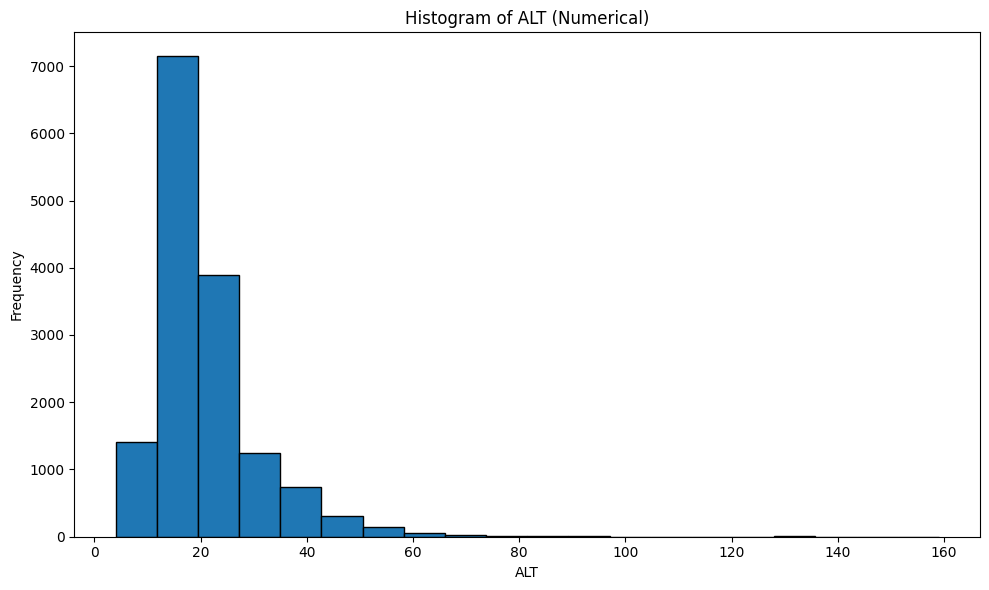


Summary for ALT:
count    15000.000000
mean        20.792467
std         10.312456
min          4.000000
25%         14.000000
50%         18.000000
75%         24.000000
max        159.000000
Name: ALT, dtype: float64
Missing values: 0


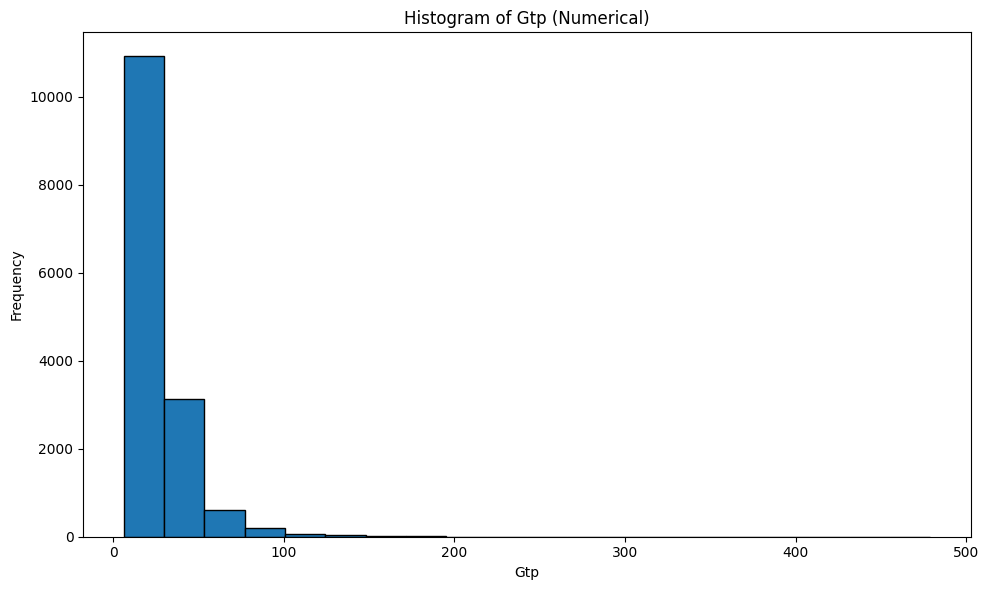


Summary for Gtp:
count    15000.000000
mean        26.254333
std         19.702116
min          6.000000
25%         15.000000
50%         21.000000
75%         31.000000
max        479.000000
Name: Gtp, dtype: float64
Missing values: 0


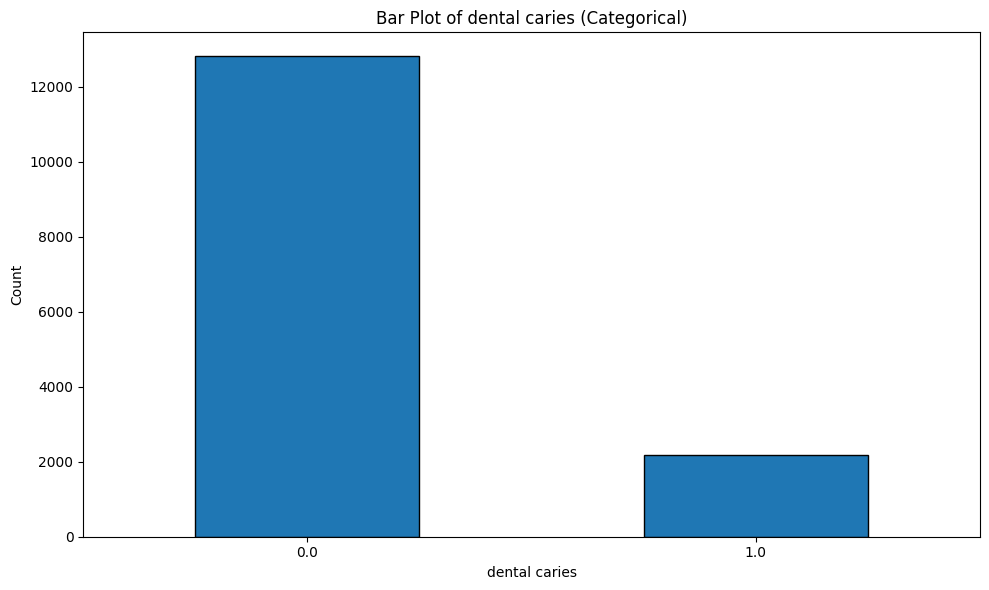


Summary for dental caries:
dental caries
0.0    12813
1.0     2187
Name: count, dtype: int64
Missing values: 0


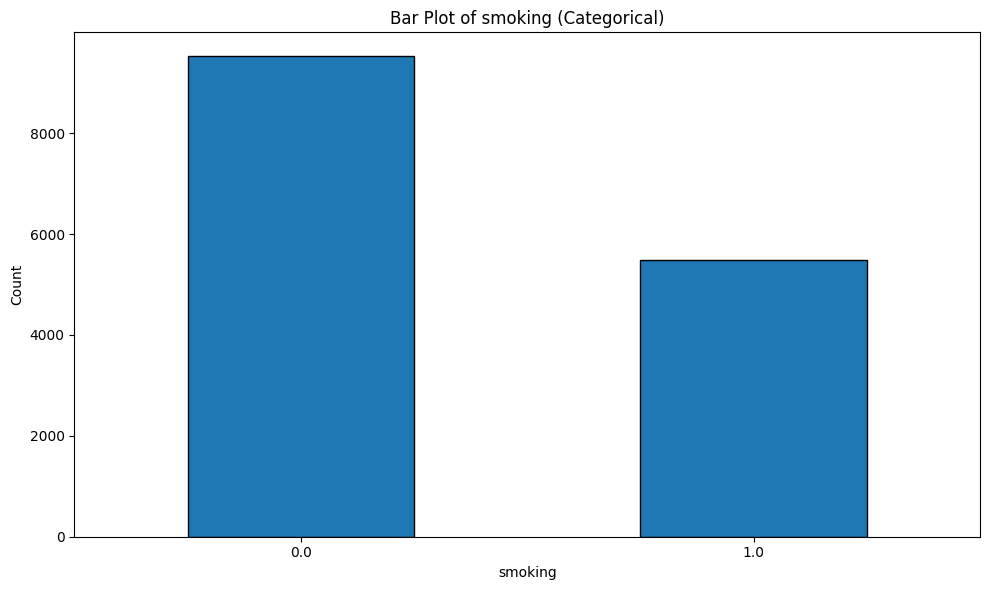


Summary for smoking:
smoking
0.0    9523
1.0    5477
Name: count, dtype: int64
Missing values: 0


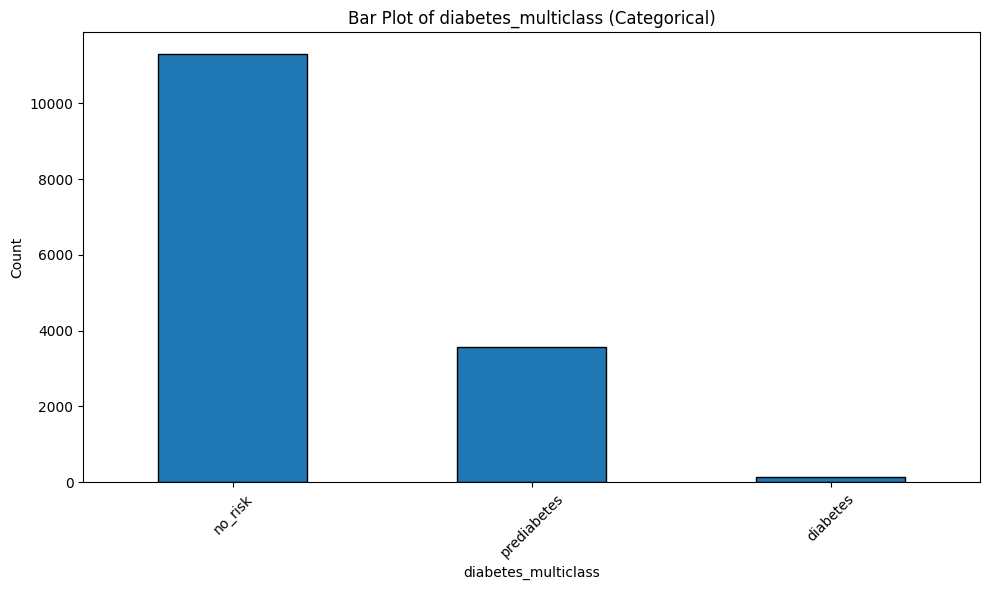


Summary for diabetes_multiclass:
diabetes_multiclass
no_risk        11306
prediabetes     3556
diabetes         138
Name: count, dtype: int64
Missing values: 0


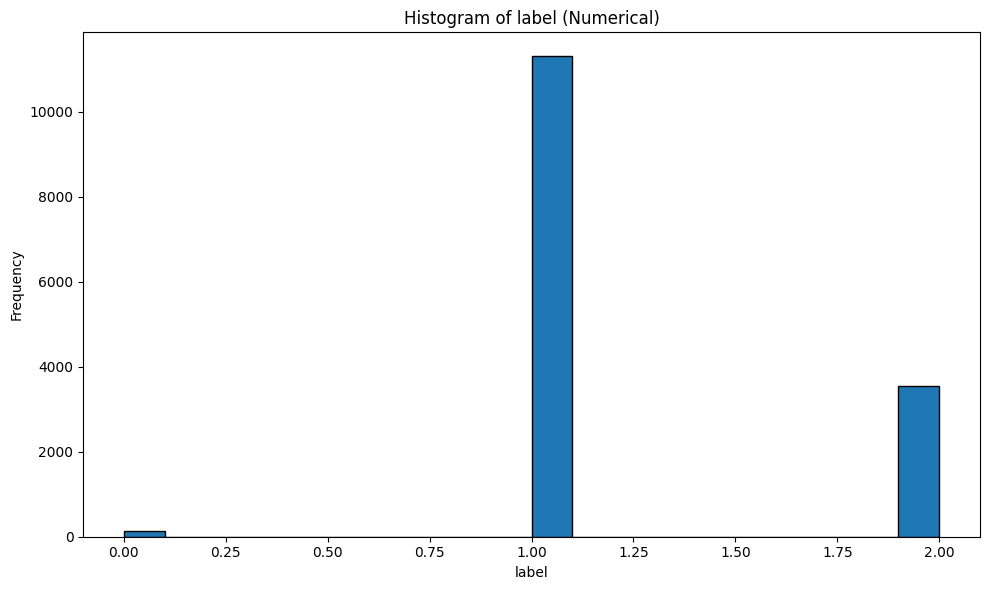


Summary for label:
count    15000.000000
mean         1.227867
std          0.440859
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: label, dtype: float64
Missing values: 0


In [ ]:
# Visualize data variables
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot appropriate visualizations for each column in df
def plot_features(df):
    # Print basic info to confirm data
    print("Dataset Info:")
    print(df.info())
    print("\nFirst few rows:")
    print(df.head())


    # Loop through each column and plot
    for column in df.columns:
        plt.figure(figsize=(10, 6))

        # Check if column is numerical
        if df[column].dtype in ['int64', 'float64']:
            # Get unique values (ignoring NaN)
            unique_values = df[column].dropna().unique()

            # Check if column is binary (0 and 1) or (1 and 2)
            is_binary_01 = set(unique_values).issubset({0, 1}) and len(unique_values) <= 2
            is_binary_12 = set(unique_values).issubset({1, 2}) and len(unique_values) <= 2
            is_categorical = is_binary_01 or is_binary_12

            if is_categorical:
                # Plot bar plot for binary/categorical data
                df[column].value_counts().plot(kind='bar', edgecolor='black')
                plt.title(f'Bar Plot of {column} (Categorical)')
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.xticks(rotation=0)  # No rotation for simple binary labels
            else:
                # Plot histogram for non-binary numerical data
                plt.hist(df[column].dropna(), bins=20, edgecolor='black')
                plt.title(f'Histogram of {column} (Numerical)')
                plt.xlabel(column)
                plt.ylabel('Frequency')

        # For categorical/string data
        else:
            # Plot bar plot for categorical data
            df[column].value_counts().plot(kind='bar', edgecolor='black')
            plt.title(f'Bar Plot of {column} (Categorical)')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)  # Rotate labels for readability

        plt.tight_layout()
        plt.show()

        # Print basic stats for the column
        print(f"\nSummary for {column}:")
        if df[column].dtype in ['int64', 'float64'] and not is_categorical:
            print(df[column].describe())
        else:
            print(df[column].value_counts())
        print(f"Missing values: {df[column].isna().sum()}")

plot_features(df)



1.2 Check missing data

There are no missing data

Because of the imbalance in category number where there are high amount of no risk samples in diabetes, we try to focus more on precision-recall and f1-scores rather than accuracy. This is because the model could easily predicts the negative class, not representing the positive class.

In [ ]:
X = df.drop(columns=['diabetes_multiclass', 'label'])
y = df['label']

# Split dataset to train and test



In [ ]:
#splitting into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE

SMOTE method is recommended to correct class imbalance. Since we have few diabetes samples, we will go ahead to use SMOTE

In [ ]:
# # SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

#scale using standard scalar that we use in class, (gemini autocompleted this)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Alternatively, to scale just the numerical columns
categorical_cols = ['dental caries', 'smoking', 'hearing(left)', 'hearing(right)']
numerical_cols = X_train.columns.difference(categorical_cols)

from sklearn.preprocessing import StandardScaler

# Initialize and fit scaler on numerical columns of training data
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])

# Scale numerical columns for both train and test
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train[numerical_cols]),
    columns=numerical_cols,
    index=X_train.index
)
X_train_scaled = pd.concat([X_train_scaled, X_train[categorical_cols]], axis=1)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numerical_cols]),
    columns=numerical_cols,
    index=X_test.index
)
X_test_scaled = pd.concat([X_test_scaled, X_test[categorical_cols]], axis=1)

# Perform Multiclass classification

## 1. XGBoost model

In [ ]:
#with hyperparameters from GridSearchCV
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    reg_alpha=0.5,
    reg_lambda=0.5,
    subsample=0.8,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

y_pred = xgb_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

cv_score = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring='f1_macro')
print(f"\nCross-validated F1 (macro): {np.mean(cv_score)}")


Classification Report:

              precision    recall  f1-score   support

    diabetes       0.00      0.00      0.00        24
     no_risk       0.77      0.95      0.85      2247
 prediabetes       0.50      0.17      0.26       729

    accuracy                           0.75      3000
   macro avg       0.43      0.37      0.37      3000
weighted avg       0.70      0.75      0.70      3000


Confusion Matrix:

[[   0   18    6]
 [   2 2125  120]
 [   3  599  127]]

Cross-validated F1 (macro): 0.8651141728952503


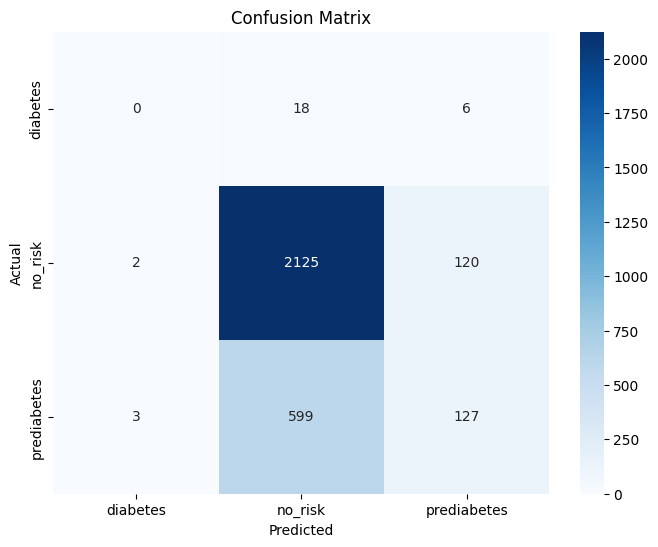

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## 2. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#the balance helps due to our imbalanced dataset, to pay more attention to the minority classes (like >125)
clf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=300,
    max_depth=7,
    max_features=0.8,
    bootstrap=True,
    random_state=42
)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

from sklearn.metrics import classification_report
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)
report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:\n")
print(report)

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

    diabetes       0.10      0.38      0.15        24
     no_risk       0.84      0.69      0.76      2247
 prediabetes       0.38      0.55      0.45       729

    accuracy                           0.66      3000
   macro avg       0.44      0.54      0.45      3000
weighted avg       0.73      0.66      0.68      3000


Confusion Matrix:

[[   9    3   12]
 [  43 1558  646]
 [  42  285  402]]


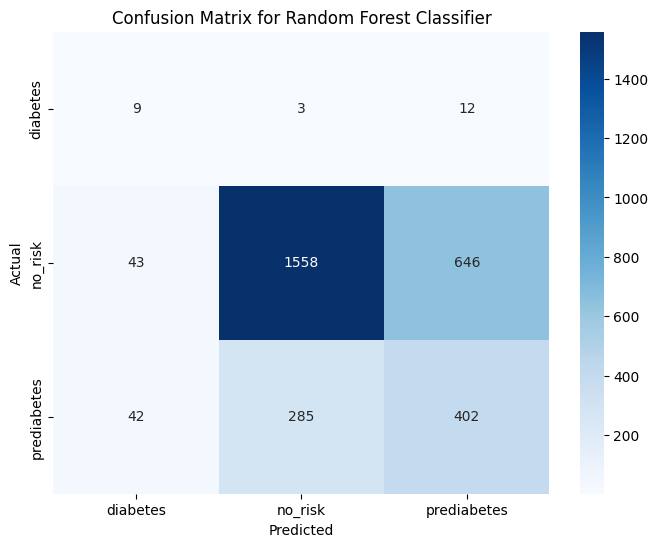

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


In [ ]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
feature_importance_df

,Feature,Importance
3,Gtp,0.138685
7,age,0.128781
15,triglyceride,0.116884
5,LDL,0.093114
16,waist(cm),0.076076
2,Cholesterol,0.065147
14,systolic,0.054936
11,hemoglobin,0.047118
9,eyesight(right),0.043367
0,ALT,0.040119


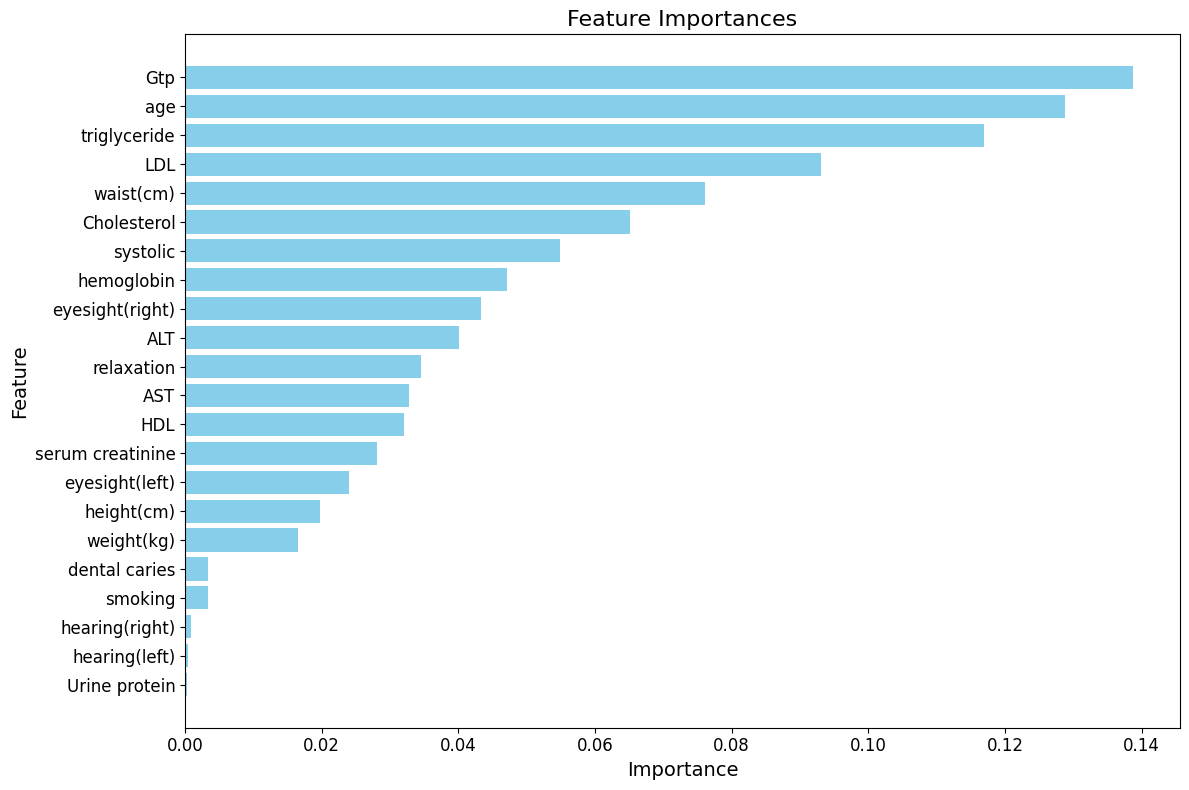

In [ ]:
import matplotlib.pyplot as plt

# Assuming feature_importance_df is already defined from the previous cell

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

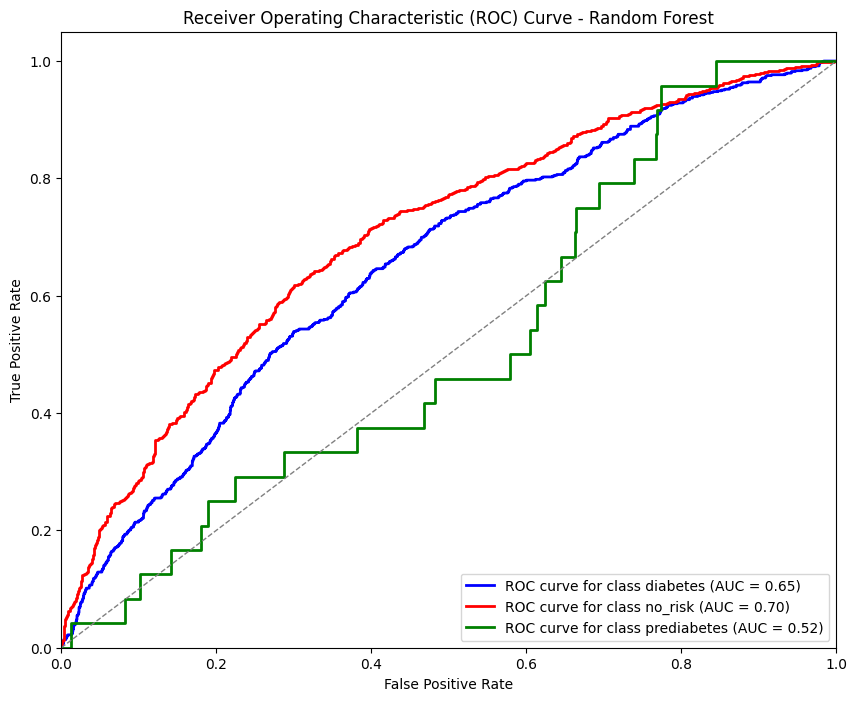

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Get the predicted probabilities for each class
y_proba_rf = clf.predict_proba(X_test_scaled)

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_rf[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_proba_rf[:, i])
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'ROC curve for class {le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# display gini
from sklearn.ensemble import RandomForestClassifier


# Access the first tree in the forest (index 0)
tree = clf.estimators_[0]

# Get the Gini impurity values for all nodes
gini_values = tree.tree_.impurity

# Print the Gini values for the first few nodes
print("Gini impurity values for the first 5 nodes:", gini_values[:5])

Gini impurity values for the first 5 nodes: [0.66629227 0.62265561 0.55163985 0.45849963 0.42692532]


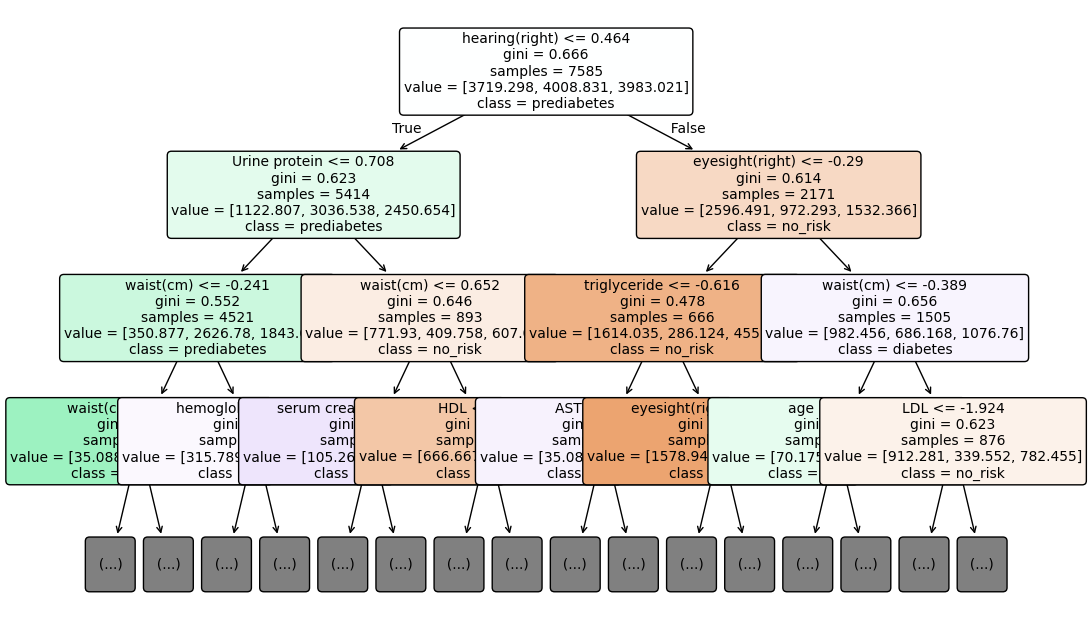

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have the 'tree' object from the previous code snippet

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(tree,
          feature_names=X_train.columns,  # Replace with your feature names
          class_names=['no_risk', 'prediabetes', 'diabetes'],  # Replace with your class names
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth = 3)  # Adjust fontsize as needed
plt.show()

We are using class_weight='balanced_subsample' so as to tell model to assign higher weights to the minor class. Increasing max_leaf_nodes did not change prediction f1-score much. After trying different combinations of n_estimator and max_leaf_nodes, we are able to see better performance when decreasing n_estimator and increase max_leaf_nodes.

In [ ]:
from sklearn.model_selection import cross_val_score

# Use y_train instead of y for cross-validation
scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='f1_macro')
print("Cross-validated F1 (macro):", scores.mean())

Cross-validated F1 (macro): 0.41390347422697077


# 3.1 Non-linear SVC

In [ ]:
# use RBF kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(class_weight='balanced', kernel='rbf', random_state=42, gamma= "scale")  # Using RBF kernel for non-linear model
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVC model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of SVC model: 0.6366666666666667
              precision    recall  f1-score   support

           0       0.05      0.29      0.08        24
           1       0.85      0.66      0.75      2247
           2       0.38      0.56      0.45       729

    accuracy                           0.64      3000
   macro avg       0.42      0.51      0.43      3000
weighted avg       0.73      0.64      0.67      3000



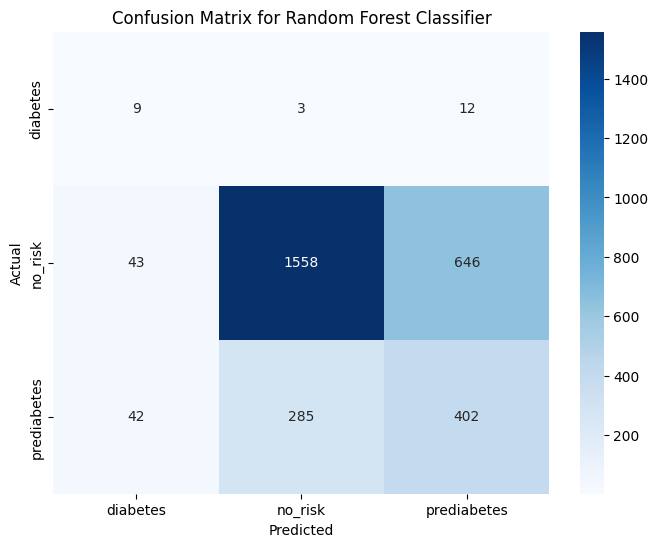

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test_labels, y_pred_labels, and le are defined from your previous code

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


In [ ]:
print("\nNumber of occurrences in y_pred:", pd.Series(y_pred).value_counts().to_dict())


Number of occurrences in y_pred: {1: 1756, 2: 1090, 0: 154}


Using RBF non-linear kernel did not make any predictions for class 0 (high risk). The F1 average stayed low after experimenting with different values of gamma. Instead, we consider an alternative using "polynomial" kernel

In [ ]:
# use polynormial model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

svc = SVC(kernel='poly', random_state=42, degree = 4, C = 10)  # Using poly kernel for non-linear model
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVC model:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy of SVC model: 0.728
              precision    recall  f1-score   support

           0       0.03      0.04      0.03        24
           1       0.77      0.93      0.84      2247
           2       0.40      0.13      0.20       729

    accuracy                           0.73      3000
   macro avg       0.40      0.37      0.36      3000
weighted avg       0.67      0.73      0.68      3000



Here the performance starts to get better, tring different combinations of degree and C value, the f1-score prediction ranging around 0.36-0.37

## 3.2 Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

y_pred = lin_clf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred) )
print(classification_report(y_test, y_pred))

0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.76      0.99      0.86      2247
           2       0.49      0.05      0.09       729

    accuracy                           0.75      3000
   macro avg       0.41      0.34      0.31      3000
weighted avg       0.68      0.75      0.66      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# perform grid search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(random_state=42, multi_class='ovr')  # 'ovr' for one-vs-rest

# Step 2: Define parameter grid for Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],      # Regularization parameter
    'max_iter': [1000, 2000, 5000],     # Maximum iterations
    'tol': [1e-4, 1e-3, 1e-2]          # Tolerance for stopping criteria
}

# Step 3: Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=linear_svc,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',# Optimize for accuracy
    n_jobs=-1          # Use all CPU cores
)
grid_search.fit(X_train_scaled, y_train)

# Step 4: Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 5: Use best model to predict on test set
best_model = grid_search.best_estimator_

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on test set:", accuracy)

# Step 7: Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.01, 'max_iter': 1000, 'tol': 0.0001}
Best Cross-Validation Accuracy: 0.75725

Accuracy on test set: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.76      0.99      0.86      2247
           2       0.49      0.05      0.09       729

    accuracy                           0.75      3000
   macro avg       0.41      0.34      0.31      3000
weighted avg       0.68      0.75      0.66      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using Grid search on Linea SVC, model performance is worse than the polynomial model, likely because our data is non-linear

## 4. SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
import numpy as np

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train_scaled, y_train)

y_pred = sgd_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SGD Classifier (3 categories):", accuracy)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy of SGD Classifier (3 categories): 0.7496666666666667
Precision: 0.41607346524622396
Recall: 0.5638574340547341


In [ ]:
# perform CV

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores (5-fold):", cv_scores)

Cross-Validation Accuracy Scores (5-fold): [0.75375    0.75666667 0.75666667 0.75541667 0.75583333]


## 5. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE


logreg_clf = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=10000)
logreg_clf.fit(X_resampled, y_resampled)  # Train with resampled data

# Make predictions
y_pred = logreg_clf.predict(X_test)

# Evaluate the model using precision and recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Precision: 0.4166524075462282
Recall: 0.5743361976920301


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


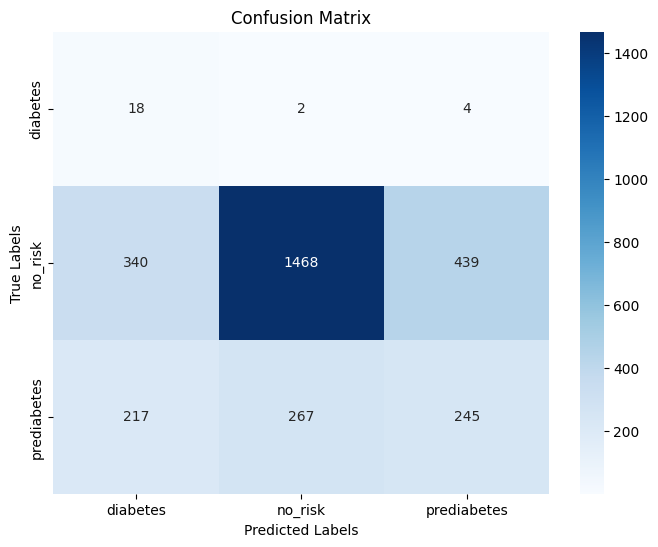

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous code cell
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Model evaluation

<ipython-input-65-fcf15d565310>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(models))


Error generating ROC curve for model 'XGBoost' and class 'diabetes': feature_names mismatch: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'] ['ALT', 'AST', 'Cholesterol', 'Gtp', 'HDL', 'LDL', 'Urine protein', 'age', 'eyesight(left)', 'eyesight(right)', 'height(cm)', 'hemoglobin', 'relaxation', 'serum creatinine', 'systolic', 'triglyceride', 'waist(cm)', 'weight(kg)', 'dental caries', 'smoking', 'hearing(left)', 'hearing(right)']
Error generating ROC curve for model 'XGBoost' and class 'no_risk': feature_names mismatch: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum c

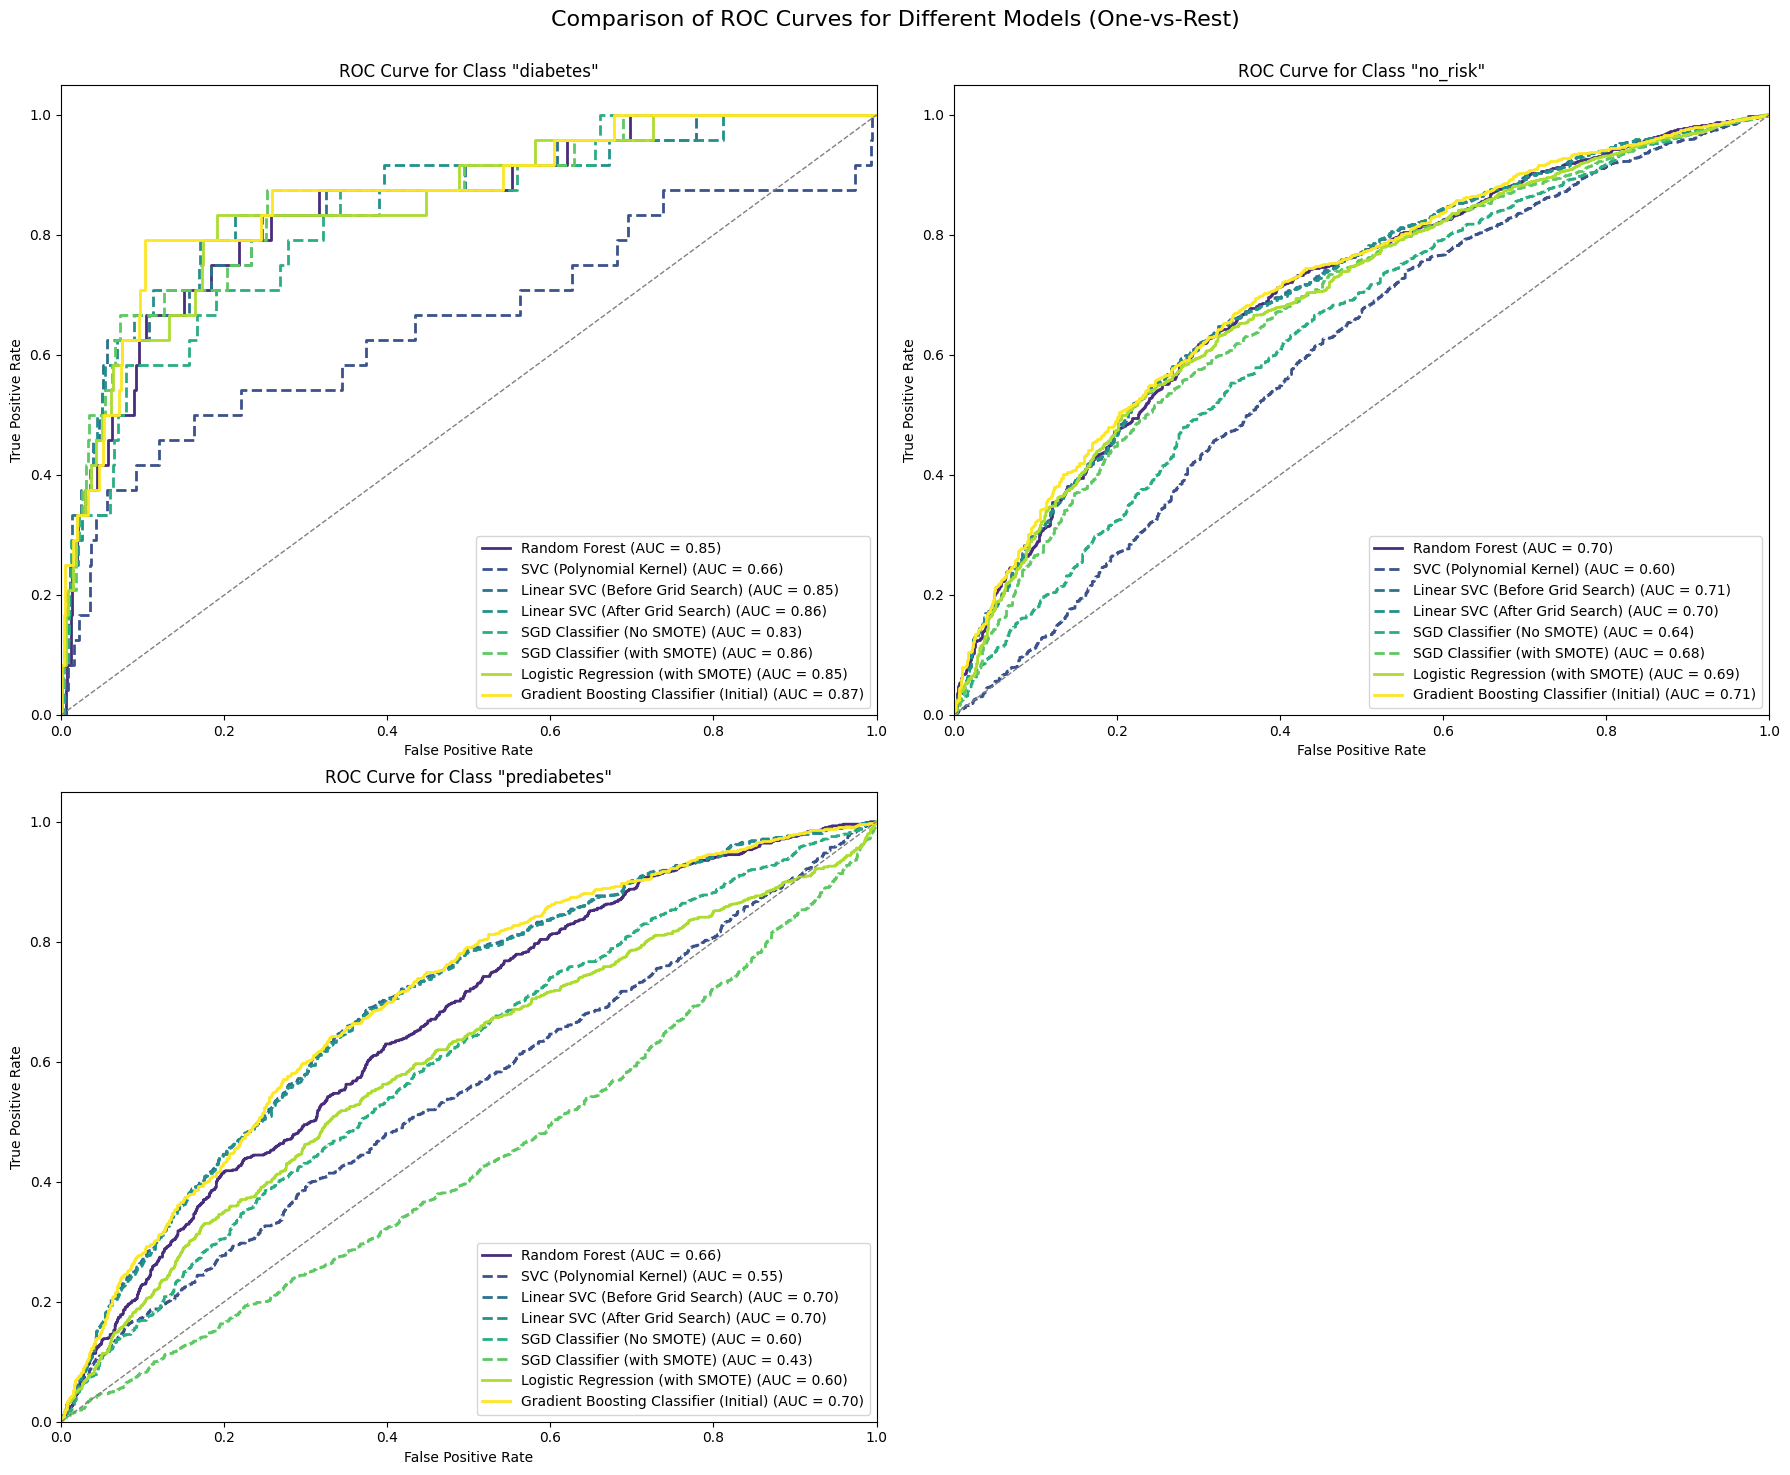

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Get the number of classes and original class names from the LabelEncoder
n_classes = len(le.classes_)
class_names = le.classes_

plt.figure(figsize=(18, 15))
colors = plt.cm.get_cmap('viridis', len(models))

# Loop through each class index (0, 1, 2)
for i in range(n_classes):
    class_label = class_names[i]  # Original label from encoder
    plt.subplot(2, 2, i + 1)

    for (name, model), color in zip(models.items(), colors(np.linspace(0, 1, len(models)))):
        try:
            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(X_test_scaled)
                fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
                roc_auc = roc_auc_score(y_test == i, y_proba[:, i])
                plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
            elif hasattr(model, "decision_function"):
                y_score = model.decision_function(X_test_scaled)
                if len(y_score.shape) > 1:
                    fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
                    roc_auc = roc_auc_score(y_test == i, y_score[:, i])
                    plt.plot(fpr, tpr, color=color, lw=2, linestyle='--', label=f'{name} (AUC = {roc_auc:.2f})')
        except AttributeError as e:
            print(f"Model '{name}' does not have predict_proba or decision_function: {e}")
        except ValueError as e:
            print(f"Error generating ROC curve for model '{name}' and class '{class_label}': {e}")

    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class "{class_label}"')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.suptitle('Comparison of ROC Curves for Different Models (One-vs-Rest)', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()

Looking at the ROC curves, diabetic class has the best prediction. Prediabetic class has the worst prediction. This is misleading because previously we saw the worst performance from the model's precision and recall metrics. The reason is likely because: The ROC curve considers the performance across all classes. In imbalanced datasets, the majority class can dominate the overall performance, making the ROC curve appear overly optimistic even if the classifier performs poorly on the minority class.

Next, we look at the F1-score because it is the harmonic mean of precision and recall, suitable for imbalanced dataset

Error evaluating model XGBoost: feature_names mismatch: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'] ['ALT', 'AST', 'Cholesterol', 'Gtp', 'HDL', 'LDL', 'Urine protein', 'age', 'eyesight(left)', 'eyesight(right)', 'height(cm)', 'hemoglobin', 'relaxation', 'serum creatinine', 'systolic', 'triglyceride', 'waist(cm)', 'weight(kg)', 'dental caries', 'smoking', 'hearing(left)', 'hearing(right)']


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

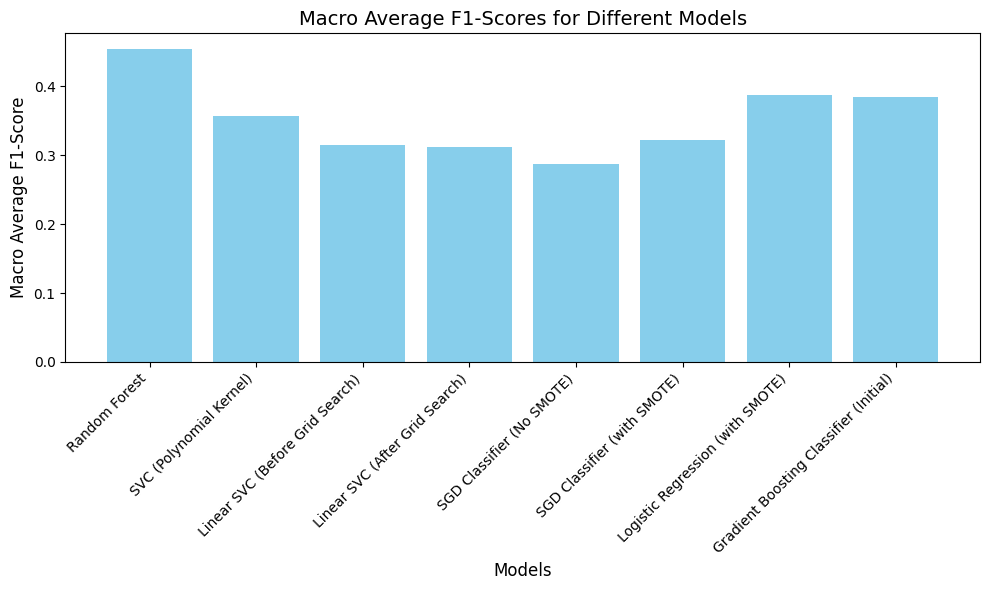

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'models' dictionary is defined from the previous code cell
macro_avg_f1_scores = {}
for name, model in models.items():
    try:
        y_pred = model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, output_dict=True)
        macro_avg_f1 = report['macro avg']['f1-score']
        macro_avg_f1_scores[name] = macro_avg_f1
    except Exception as e:
        print(f"Error evaluating model {name}: {e}")

# Plotting the macro average F1-scores
models_names = list(macro_avg_f1_scores.keys())
f1_scores = list(macro_avg_f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models_names, f1_scores, color='skyblue')
plt.xlabel("Models", fontsize=12)
plt.ylabel("Macro Average F1-Score", fontsize=12)
plt.title("Macro Average F1-Scores for Different Models", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# 6. Gradient Boost with Smote and GridSearchCV

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, make_scorer

# 1. Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

#gradient boost model
model = GradientBoostingClassifier(random_state=42)

# 3. Parameter grid options
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# 4. Create a scoring function (e.g., F1-score)
scoring = make_scorer(recall_score, average='macro')

# 5. Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5, n_jobs=-1, verbose=2)

# 6. Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# 7. Get the best hyperparameters and model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_

# 8. Evaluate the best model on the original test set (without SMOTE)
y_pred = best_model.predict(X_test_scaled)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")